In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv("austin_final.csv")
  
# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column 
# will serve as the label 
X = data.drop(['PrecipitationSumInches'], axis = 1)
X = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)
# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

In [7]:
X 

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,49.0,75.0,29.68,7.0,4.0
1,48,36.0,68.0,30.13,10.0,6.0
2,45,27.0,52.0,30.49,10.0,3.0
3,46,28.0,56.0,30.45,10.0,4.0
4,50,40.0,71.0,30.33,10.0,2.0
...,...,...,...,...,...,...
1314,89,67.0,54.0,29.97,10.0,5.0
1315,91,64.0,54.0,29.90,10.0,5.0
1316,92,64.0,51.0,29.86,10.0,4.0
1317,93,68.0,48.0,29.91,10.0,4.0


In [8]:
day_index = 798 #this will be colored red in next plot
days = [i for i in range(Y.size)]

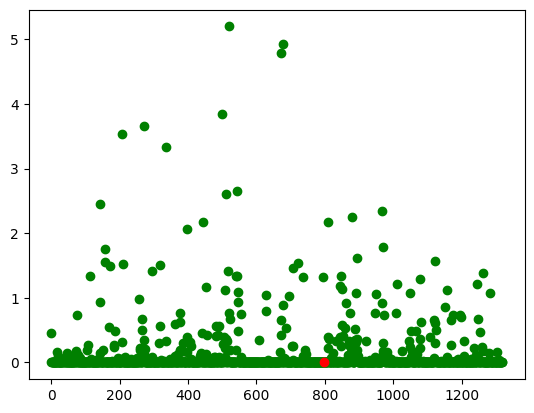

In [9]:
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')

In [10]:
X.corr()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
TempAvgF,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267
DewPointAvgF,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257
HumidityAvgPercent,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472
SeaLevelPressureAvgInches,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604
VisibilityAvgMiles,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522
WindAvgMPH,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000


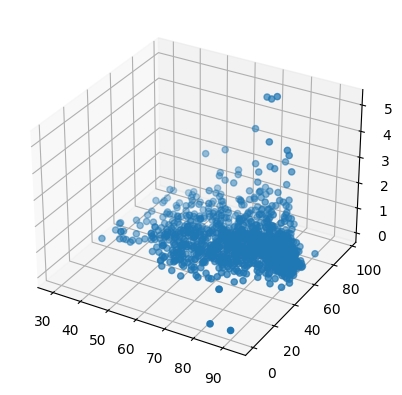

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[X.columns.values[0]],X[X.columns.values[2]], Y)

In [12]:
def train_val_test_split(X, Y): # split up the dataset into a training and testing set. 
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    X_train = X[p[:tr],:] 
    Y_train = Y[p[:tr]]
    X_val = X[p[tr+1:te],:]
    Y_val = Y[p[tr+1:te]]
    X_test = X[p[te+1:],:]
    Y_test = Y[p[te+1:]]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test 

In [13]:
#X is a pandas data frame, that has to be converted into a numpy array
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X.to_numpy(),Y)

In [14]:
X_train

array([[58.  , 45.  , 62.  , 30.24, 10.  ,  5.  ],
       [87.  , 73.  , 70.  , 29.93, 10.  ,  2.  ],
       [46.  , 39.  , 76.  , 30.06,  7.  ,  3.  ],
       ...,
       [73.  , 55.  , 60.  , 30.04, 10.  ,  2.  ],
       [39.  , 36.  , 86.  , 30.33,  4.  ,  5.  ],
       [63.  , 52.  , 73.  , 30.1 , 10.  ,  5.  ]])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LR = LinearRegression()

In [17]:
# use sklearn to fit training data matrix to training output
LR.fit(X_train,Y_train)

LinearRegression()

In [18]:
# These are the thetas that are result of the above fit
print(LR.intercept_,LR.coef_)

[0.46808006] [[-0.00604879  0.0076579   0.00241704  0.01096668 -0.0956131   0.00538894]]


In [19]:
#Use sklearn predict function to predict output for validation data matrix
Yhat_skl_val = LR.predict(X_val)

In [20]:
#This is the Mean Square error -- insample (error in that data used for fitting) and outsample (error in the data not used for fitting)
E_in = np.mean((Y_train-LR.predict(X_train))**2)
E_out = np.mean((Y_val-LR.predict(X_val))**2)
print(E_in,E_out)


0.16381052105598837 0.1363895709286063


In [21]:
#Here we are using the psuedo inverse/analytical method to get an analytical solution for minimizing mean square error

pinv_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(),X_train)),X_train.transpose()),Y_train)
#                                              From Ab: pinv_theta = (A^T A)^{-1}A^{T}b  (moore-penrose pseudoinverse)


In [22]:
# For the linear regression model this is the predicted output
def predict(X, theta):
    return np.matmul(X,theta)

In [23]:
pinv_theta

array([[-0.00309272],
       [ 0.00469166],
       [ 0.00413804],
       [ 0.02065914],
       [-0.09339039],
       [ 0.00560338]])

In [24]:
#predicting output using the pinv_theta from above


Yhat_pinv_val = predict(X_val,pinv_theta)

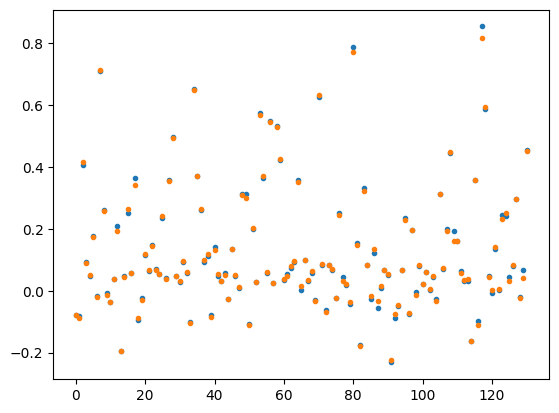

In [42]:
plt.plot(Yhat_skl_val,'.')
plt.plot(Yhat_pinv_val,'.')
# plt.plot(hatY_val,'.')
#plt.plot(hatY_aug_val,'.')

In [26]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_train,pinv_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_val)**2)
print(E_in,E_out)

0.1640072493721633 0.13614866705107773


In [27]:
X_aug_train =  np.c_[X_train,np.ones(len(Y_train))]
X_aug_val =  np.c_[X_val,np.ones(len(Y_val))]

In [28]:
pinv_aug_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug_train.transpose(),X_aug_train)),X_aug_train.transpose()),Y_train)

In [29]:
Yhat_pinv_aug_val = predict(X_aug_val,pinv_aug_theta)

In [30]:
pinv_aug_theta

array([[-0.00604879],
       [ 0.0076579 ],
       [ 0.00241704],
       [ 0.01096668],
       [-0.0956131 ],
       [ 0.00538894],
       [ 0.46808006]])

In [31]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_aug_train,pinv_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_aug_val)**2)
print(E_in,E_out)

0.16381052105598837 0.1363895709286071


### Q1) 
```E_in, E_out reported for Augmented vs Non-Augmented are very similar (down to two decimal points). What is the reason for that? Do you expect that for say data that lies along (y=4x+2) line? (5 pts)```

Answer below using Markdown as a cell or answer in seperate document/sheet.

Effecitvely the augmented and non-augmented data-sets have the same properties so having similar values of theta makes sense. For data that lies along a line we would expect these two to be identical.

### Q2) 
```Does scaling the data matrix such that its mean 0 and variance 1 make a differnce to results? Use 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
to scale data and then do pinv estimate of theta again, and report Ein, Eout. 
Would you do augmentation before or after Scaling? (5 pts)```

In [32]:
#Initializing theta -- could be all zero or random numbers with mean zero
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [33]:
theta = init(X_train,zeros=False)

In [34]:
#initial prediction
predict(X_train,theta)

array([[18.87719628],
       [21.94657895],
       [25.71647753],
       [22.86488651],
       [21.90019183],
       [24.87423276],
       [12.11924893],
       [21.85385885],
       [21.57991396],
       [19.31275621],
       [23.48309197],
       [31.17990748],
       [22.39305235],
       [19.36140568],
       [18.72957611],
       [ 9.65024364],
       [18.50084414],
       [31.39321619],
       [24.13251004],
       [20.54828496],
       [23.66306905],
       [20.70090093],
       [28.62174123],
       [27.66257938],
       [21.37228055],
       [14.98679104],
       [28.41052176],
       [22.95023453],
       [21.05472928],
       [26.71331035],
       [21.9153589 ],
       [17.47844031],
       [19.30535434],
       [15.7912172 ],
       [17.46826266],
       [15.11873062],
       [15.98282597],
       [22.63870517],
       [15.85238219],
       [18.40651196],
       [24.89064753],
       [19.5061819 ],
       [23.07289565],
       [20.63134035],
       [20.83290859],
       [24

In [35]:
#Update for each theta
def update_weights( X, Y,  theta ) :
             
        Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - Y_pred )  ) / m          
        return dtheta

In [36]:
update_weights(X_train,Y_train,theta)

array([[2928.66084912],
       [2383.35995051],
       [2889.43743346],
       [1245.28479037],
       [ 369.45976323],
       [ 207.06533949]])

In [37]:
#iterative SGD each update with the entire training set -- batch gradient descent, page 5 Andrew Ng notes,  
learning_rate = 0.00001
theta = init(X_aug_train)
for _ in range(1000):
    dtheta = update_weights(X_aug_train,Y_train, theta)
    print(dtheta)
    theta = theta-learning_rate*dtheta

[[-16.00251354]
 [-14.67183099]
 [-19.22972914]
 [ -6.88830141]
 [ -1.51588299]
 [ -1.19919827]
 [ -0.23001083]]
[[-11.03822992]
 [-10.65877173]
 [-14.57244544]
 [ -4.8250323 ]
 [ -0.89086488]
 [ -0.85616695]
 [ -0.16111823]]
[[ -7.44628122]
 [ -7.75419046]
 [-11.19870774]
 [ -3.33128025]
 [ -0.4385561 ]
 [ -0.60782632]
 [ -0.11124355]]
[[-4.84777472]
 [-5.65204568]
 [-8.75415149]
 [-2.24980907]
 [-0.11127325]
 [-0.42803348]
 [-0.0751362 ]]
[[-2.96842583]
 [-4.13079062]
 [-6.98224827]
 [-1.46679372]
 [ 0.1255022 ]
 [-0.29786332]
 [-0.04899519]]
[[-1.60967698]
 [-3.03004514]
 [-5.69729429]
 [-0.89983502]
 [ 0.2967586 ]
 [-0.20361571]
 [-0.03006896]]
[[-0.62779018]
 [-2.23370833]
 [-4.76485657]
 [-0.48928329]
 [ 0.42058528]
 [-0.13537302]
 [-0.01636563]]
[[ 0.08128805]
 [-1.65773349]
 [-4.08761752]
 [-0.19195749]
 [ 0.51007732]
 [-0.08595573]
 [-0.00644325]]
[[ 5.92883129e-01]
 [-1.24127828e+00]
 [-3.59512787e+00]
 [ 2.34016428e-02]
 [ 5.74714365e-01]
 [-5.01665333e-02]
 [ 7.42036415e-04

### Bonus Q3) 
```In Andrew Ng notes on page 5 the update rule "batch gradient descent" is given. where updates are done for the entire training set:```
> Repeat Until Convergence {$\theta_j (t+1) = \theta_j(t)+\alpha\sum_{i=1}^m(y_i-h_\theta(x_i))x_{ij}$ }

``` Make sure that the rule coded  in **update_weights()** and  the equation from Ng's notes are consistent. (Andrew Ng uses sum over samples, while code above uses matrix multiplication and then divides by m, Andrew Ng updates are +learning_rate*dtheta, while code is -learning_rate*dtheta).(5 pts)```

In [38]:
sgd_aug_theta = theta
sgd_aug_theta

array([[-0.00565011],
       [ 0.00363209],
       [ 0.00775468],
       [-0.00489555],
       [-0.005645  ],
       [-0.00026615],
       [-0.00015008]])

In [39]:
Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)

In [40]:
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

0.17907624488816087 0.12956359955381727


### Q4) 
```
A. Instead of doing a fixed number of iterations like 1000 above, define a convergence criteria -- it could be for example relative change in dtheta per iteration. (5 pts)
B. The E_in for SGD is much worse than E_in for pinv method or the sklearn method. It can be improved by

    a. Setting better inital learning rate 
    b. Lowering learning rate with iterations

Please experiment with (a) and (b) above to get E_in and E_out for SGD close (very) to E_in and E_out of Pinv method. (15 pts)
```

### Bonus Q5) 
```Instead of using the Batch Gradient Descent method above where the updates are done using the entire training data set, use the Stochastic Gradient Descent method, Andrew Ng page 7 top, where updates are done for each training sample. ```
> Repeat Until convergence { for i =1 to m { $\theta_j (t+1) = \theta_j(t)+\alpha(y_i-h_\theta(x_i))x_{ij}$ }}

```Get similar E_in and E_out as above (5 pts) ```

### Q6) 

```Rewrite above Stochastic Batch Gradient Descent to work over batches. Let there b batches each of size <=k```
> Repeat Until convergence { for i =1 to b { $\theta_j (t+1) = \theta_j(t)+\alpha\sum_{i=1}^k(y_i-h_\theta(x_i))x_{ij}$ }}

```Note that if say your training sample is for example 910 samples, there will be 9 batches of 100 samples and one batch 10 samples. So there will be 10 batches that will constitute an "epoch". And there will be multiple iterations over the epoch to get good result. (10 pts)```

### Q7) 

``` To get better results one can regularize the cost function. Original cost function is```

$J(\theta) = \sum_{i=0}^m (y_i -theta x_i)^2$

```the regularlized cost function is ```

$J(\theta) = \sum_{i=0}^m (y_i -theta x_i)^2+\lambda ||\theta||_2$

```where $\lambda$ is a regularlization constant (set by you) and $|| \dot||_2$ is the $L_2$ norm. For this cost function find `dtheta` and then do experiment Q4 B again to report best E_in and E_out results (20 pts)```